## Convert_Color_Image_TO_Pencil_Sketch

In [1]:
#Install Imageio package
!pip install imageio

In [2]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

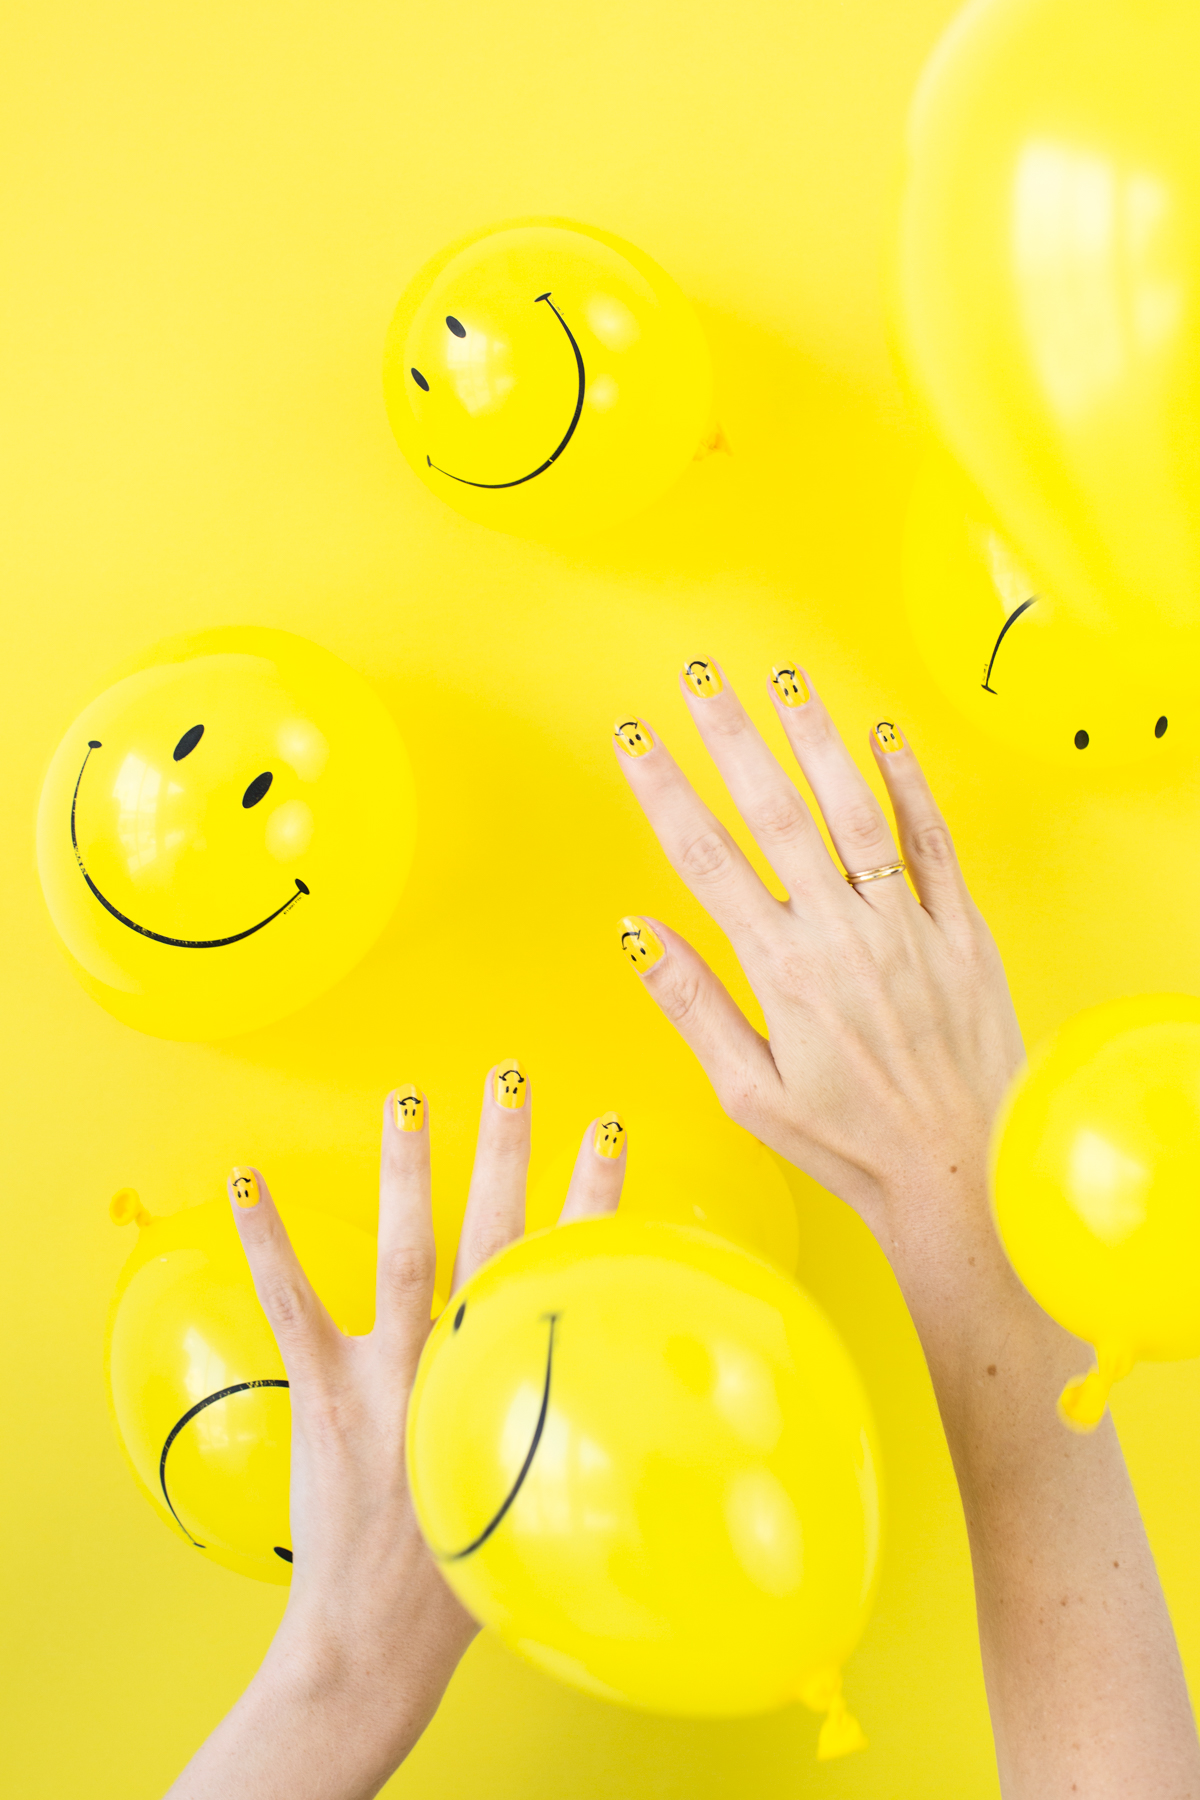

In [3]:
#Display the image from the web using an url.
img ="https://studiodiy.com/wp-content/uploads/2016/03/Smiley-Face-Mani-6.jpg"
dp.Image(requests.get(img).content)

In [4]:
#Read the image using imgaeio package's imread method and url from web using
source_img = imageio.imread(img)

In [5]:
# mark the image black and white using function y = 0.299*R + 0.587*G + 0.114*B i.e applying greyscale
import numpy as np

def grayscaleimg(rgb):
    return np.dot(rgb[...,:3], [0.299 , 0.587 , 0.114])

gryscl_img = grayscaleimg(source_img)

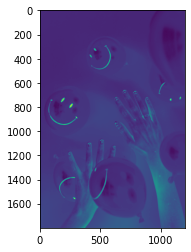

In [6]:
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

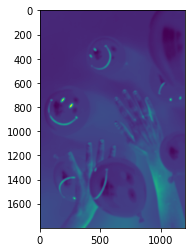

In [7]:
# Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img,sigma=5)
plt.imshow(blurred_img)

In [8]:
# creat function to perform dogding (blending together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img)
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [9]:
#Generate th target image by applying the dodge
target_img = dodging(blurred_img,gryscl_img)

C:\Users\suraj\AppData\Local\Temp\ipykernel_21508\1421534379.py:3: RuntimeWarning: divide by zero encountered in true_divide
  resultant_dodge=blur_img*255/(255-gryscl_img)


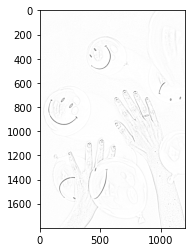

In [10]:
#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img,cmap="gray")

In [11]:
#Save the Image
plt.imsave('target_image.png',target_img,cmap='gray', vmin=0 , vmax=255)